# COVID XRAY Image Analysis

## Model Interpretability

### Importing `libraries`

In [1]:
import numpy as np
import shap
from tensorflow.keras.models import load_model
from joblib import load
from sklearn.model_selection import train_test_split

In [2]:
model = load_model('../data/ckpt/cnn_model_wholeimages.keras')

In [3]:
# Load the dataframe
data_all = load('../data/data_all.joblib')

In [4]:
X = data_all.drop('label', axis = 1)
y = data_all.label.replace({'Normal': 0, 'Lung Opacity': 1, 'Pneumonia': 2, 'COVID': 3})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [5]:
X_train = np.array(X_train).reshape((-1, 299, 299, 1))
X_test = np.array(X_test).reshape((-1, 299, 299, 1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train = np.array(y_train)
y_test = np.array(y_test)

/Users/philipptrinh/anaconda3/lib/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


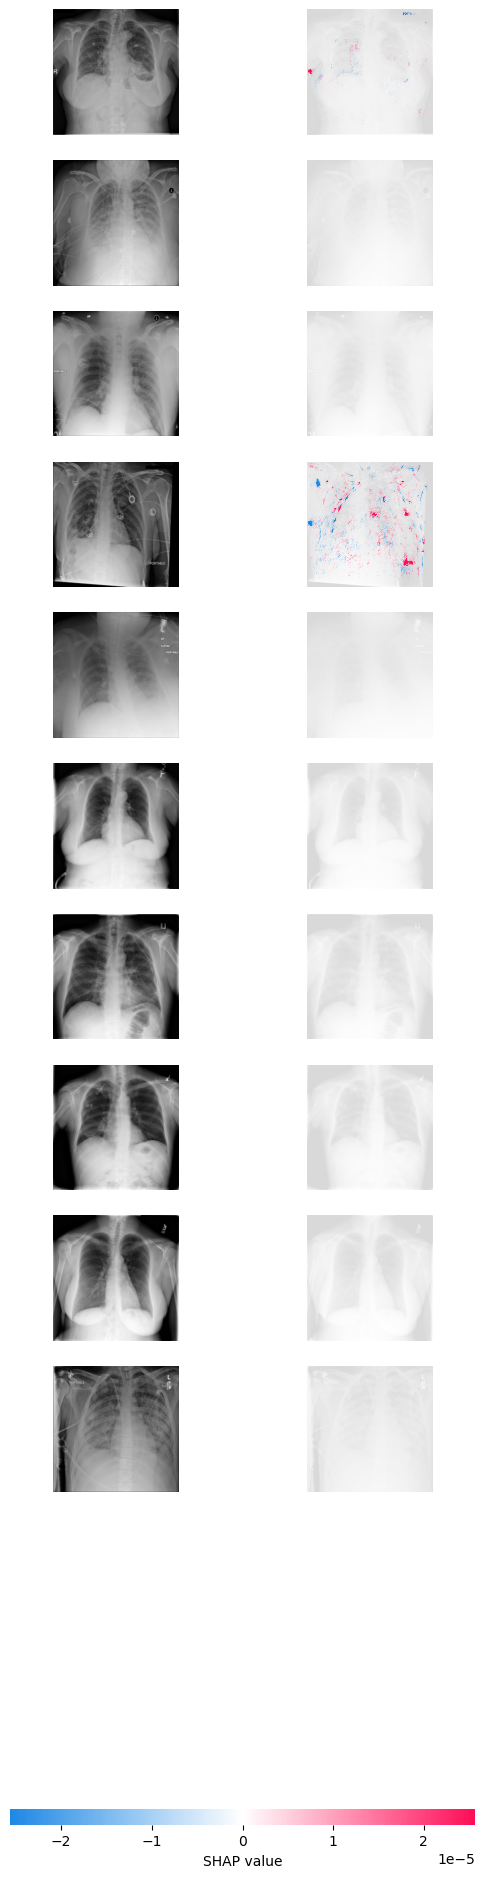

In [15]:
# Select a background dataset for SHAP
background = X_train[:100]

# Create the SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Select a subset of test data to explain
test_samples = X_test[:10]

# Compute SHAP values
shap_values = explainer.shap_values(test_samples)

# Visualize the SHAP values
shap.image_plot(shap_values, test_samples)

/Users/philipptrinh/anaconda3/lib/python3.11/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


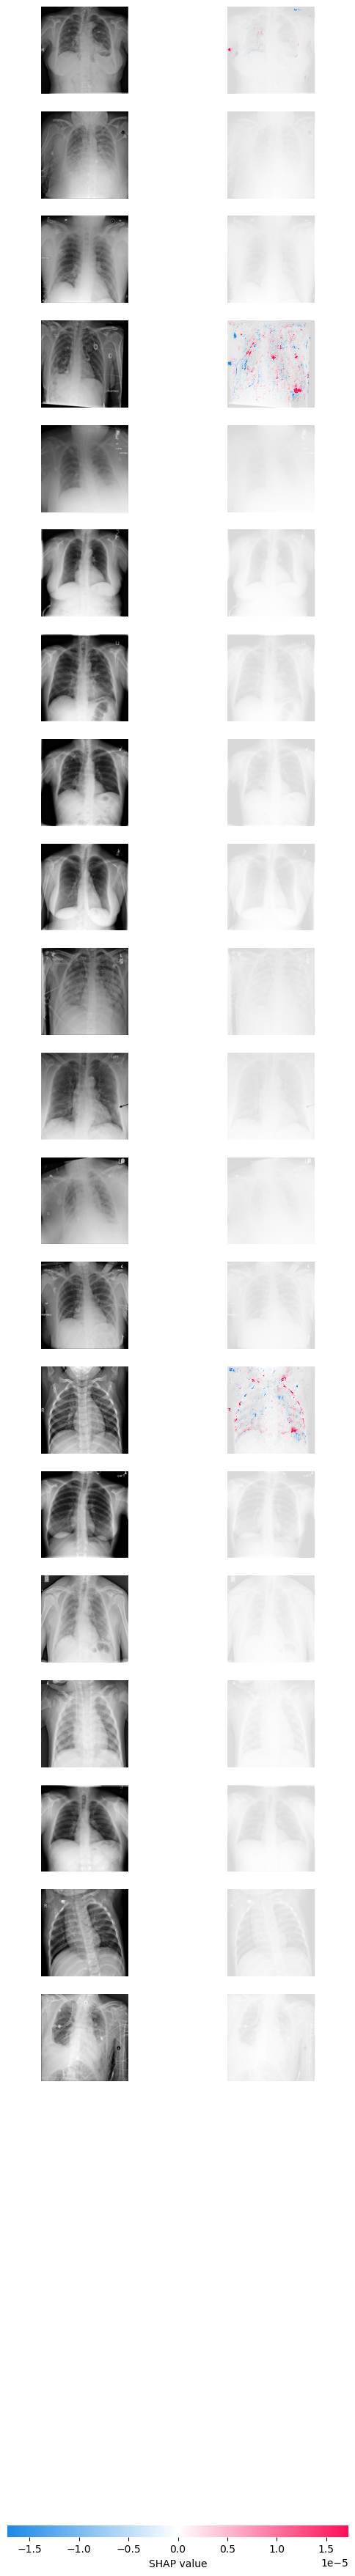

In [7]:
# Select a background dataset for SHAP
background = X_train[:200]

# Create the SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Select a subset of test data to explain
test_samples = X_test[:20]

# Compute SHAP values
shap_values = explainer.shap_values(test_samples)

# Visualize the SHAP values
shap.image_plot(shap_values, test_samples)